Note:

- Do not modify or change any hyperparameters or code other than what's blank.
- Focus on completing the missing parts accurately.


# Step 1 Import Libraries
Context:
- While printing a dataframe to avoid columns being missed out we can use "pd.set_option('display.max_columns', None)". This will display all the columns.

Hints:
1. Import functions to calculate accuracy score, confusion matrix ,roc auc score and classification report from sklearn.metrics 
2. Import relevant function for min max scaling from from sklearn.preprocessing
3. Import relevant function for k neighbors classification from sklearn.neighbors library

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
import warnings
from IPython.display import display
pd.set_option('display.max_columns', None)

# Step 2  Load dataset

Hints:
1. Use the read_csv method of pandas to load the csv file

In [2]:
df = pd.read_csv("../data/hotel.csv")

# Step 3 Exploratory Data Analysis (EDA)

# Display the top 10 rows of the dataframe
Hints:

1. Use head method to get the top 10 rows of the dataframe

In [3]:
df_head=df.head(10)
df_head

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


## Information about data  
Hints:

1. To display information about the DataFrame, including data types and non-null values, you can use the info method.

In [4]:
df_info = df.info()
display(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

None

## Check for duplicate rows and drop them

Hints:
1. Use duplicated method followed by sum method
2. If you find duplicates you can remove them using drop_duplicates method

In [5]:
count_of_duplicate_rows = df.duplicated().sum()
print(count_of_duplicate_rows)

31994


In [6]:
df = df.drop_duplicates()

In [7]:
count_of_duplicate_rows_2 = df.duplicated().sum()
print(count_of_duplicate_rows_2)

0


## Null values count in each column of the DataFrame

Hints:
1. Use the isnull method followed by the sum method

In [8]:
null_count = df.isnull().sum()
print(null_count)

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


# Visualizing null values in each feature
Context:
- Visualizing missing data can help you quickly identify the presence of missing values across columns in the data

Hints:
1. Calculate the null values in each column using isnull method and store it in a variable
2. Pass this variable to heatmap method of seaborn library
3. Use relevant names in x,y labels and the title

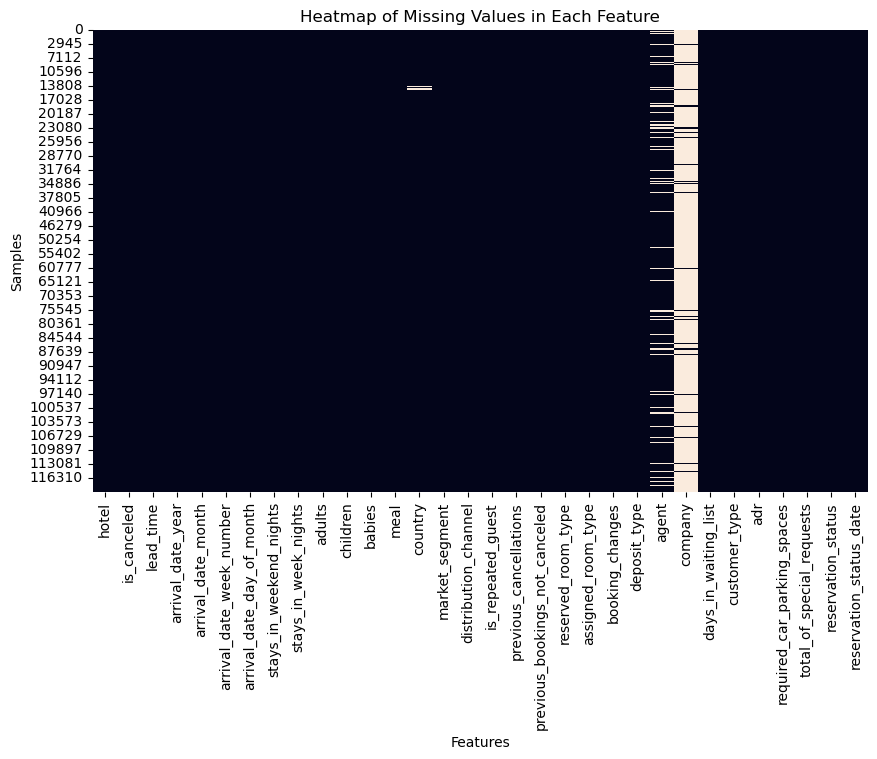

In [9]:
missing_data = df.isnull()

plt.figure(figsize=(10, 6))  
heat_map = sns.heatmap(missing_data, cbar= False)


plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('Heatmap of Missing Values in Each Feature')

plt.show()

# Visualize relation between numeric features using pairplot
Context:
- Pairplots for numeric variables can help identify relationships between them
- If two features are directly proportional i.e. they have a linear relation then consider dropping one of the features before building the model to tackle multicollinearity

Hints:
1. Use pairplot method from seaborn library
2. Pass the data, x variable and y variable( in our data the two numeric columns - lead_time and adr)
3. Give relevant title and axes labels

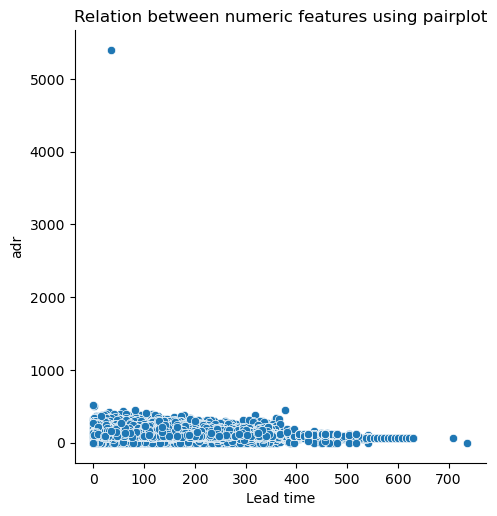

In [10]:

pair_plot = sns.pairplot(df, x_vars='lead_time', y_vars='adr', height=5)

plt.xlabel('Lead time')
plt.ylabel('adr')
plt.title('Relation between numeric features using pairplot')

plt.show()


## Check distribution of the target variable
Context:
- In classification problems, understanding the distribution of target variable is important. 
- If one class significantly outweighs the others, we call it class imbalance. 
- Class imbalance can result in model being biased toward the majority class

### For Barchart plotting
Hints:
1. Calculate the count of each category using the column from dataframe followed by value_counts method
2. Use the relevant function from seaborn to plot the barchart
3. Specify the index of the value_counts to plot on the x-axis (like category) and the values of the value_counts on the y-axis(like count of each category)
4. Set the x and y axis labels to describe the data
5. Give the plot an appropriate title describing the data
6. Show the plot with show method from matplotlib.pyplot

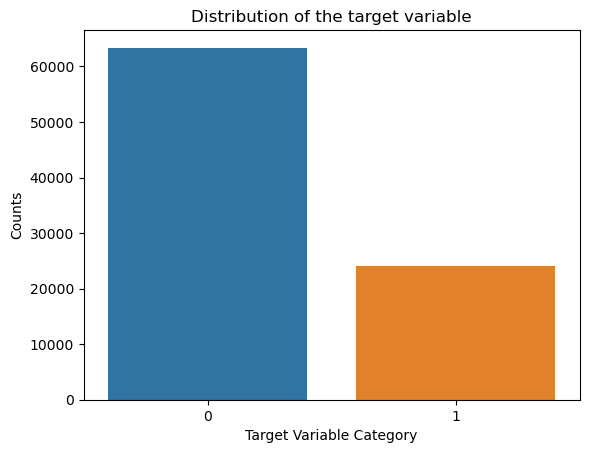

In [11]:

value_counts = df['is_canceled'].value_counts()

cancellation_barplot = sns.barplot(x=value_counts.index, y=value_counts.values)

plt.xlabel('Target Variable Category')
plt.ylabel('Counts')
plt.title('Distribution of the target variable')
plt.show()


## Relation between distribution channel and target variable using countplot
Context
- This count plot visualizes the distribution of cancellations and non-cancellations across different distribution channels.
- It allows us to know if there are patterns in cancellations across distribution channels
- We plot both cancelled and non-cancelled bookings as we want to visualize the proportion of cancelation wrt total bookings. 

Hint
1. Use countplot method from seaborn library
2. Take assigned_room_type as x variable and hue as target column
3. Give relevant xlabel,ylabel and title
4. Give relevant names to the legend
5. To display the count of each category on top of each bar use annotate method

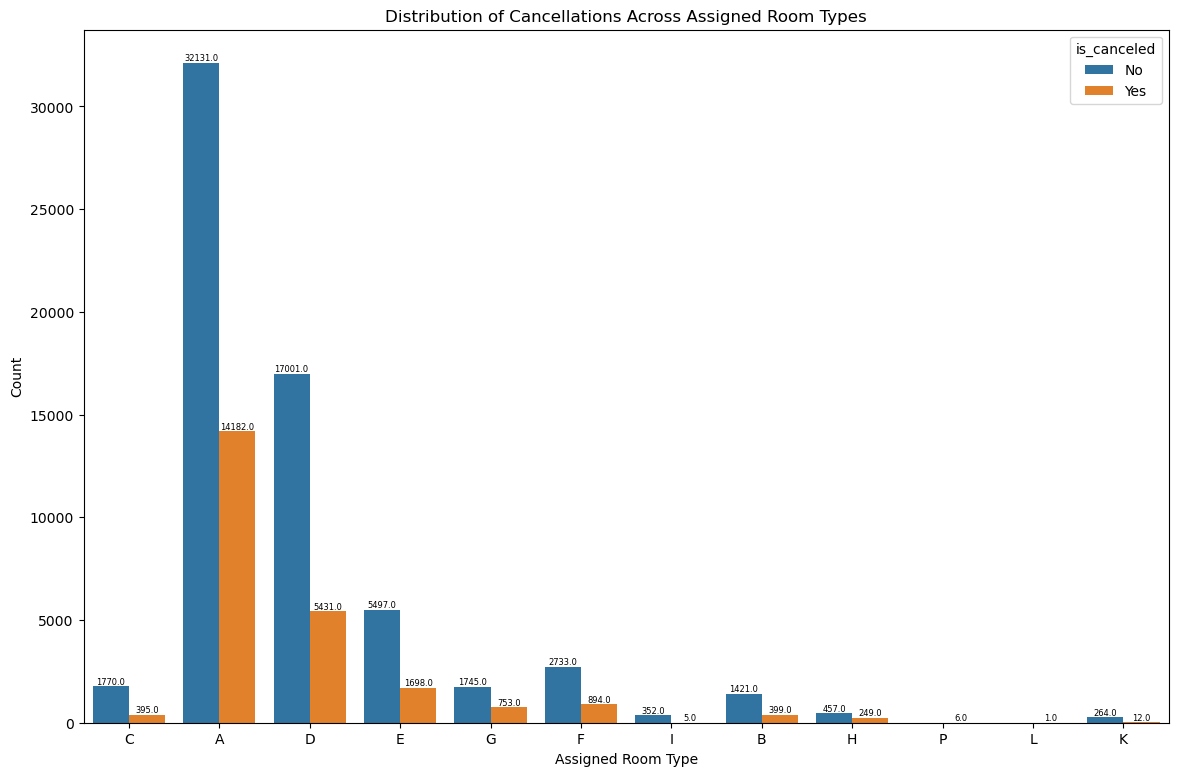

In [12]:

plt.figure(figsize=(14, 9))
ax = sns.countplot(data=df, x='assigned_room_type', hue='is_canceled')
plt.xlabel('Assigned Room Type')
plt.ylabel('Count')
plt.title('Distribution of Cancellations Across Assigned Room Types')
plt.legend(title='is_canceled', labels=['No', 'Yes'])

# Annotate the bars with respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=6)

plt.show()

# Step 4 : Data cleaning and feature engineering from date column
Context:
### Handling Missing Values
- We identify columns with a high percentage of NULL values. Columns with excessive null values can negatively impact model performance, so we often choose to drop them.
- There is not a single fixed threshold percentage above which a column must be dropped, it depends on various factors.
- If the number of features are very less then every column is very important as dropping it will cause in a huge information loss. In this case the threshold can be a very high percentage.
- If the number of features are high and the concerned feature is not of much importance then the threshold can be a low percentage.
- In our case we can set the threshold to be 50%.

### Imputing Missing Values
- For columns with relatively low percentage of NULL values, we replace the missing entries with appropriate values. This ensures prevention of information loss.
- There are many ways to replace null values like random selection, mean, median, previous value and so on.These can be used for numerical columns.
- For categorical we can replace null by methods like - most frequent category(mode), previous category, new category that does not overlap with any of the existing categories(eg. column agent can be replaced with a number like -1 which has no chance of overlapping with another agent, for country "NA" can be used)

### Columns directly derived or related to target variable
- There are some features which are directly derived from the target variable and using these features will lead to overfitting.
- In our case the column reservation_status is directly related to target column is_canceled. Whenever reservation_status is "canceled" target variable is 0 and when reservation_status is "checked out" target variable is 1.
- This column must be dropped.
- After dropping reservation_status, we don't have any use for reservation_status_date because it was related to the reservation_status. Since we're dropping the status itself, the date doesn't serve any meaningful purpose anymore, so we can drop it too.
- Drop column arrival_date as it was created just to plot time series.


Hints:
1. In EDA we had calculated the count of null values in each column,to get the percentage just divide that by length of dataframe.
2. Based on the percentage of null values we can decide whether to drop the column or replace the null values.
3. You can drop the column using drop method
4. If the percentage is less, we can replace the null values using fillna method


In [13]:
null_value_percentage = df.isnull().sum()/len(df)
print(null_value_percentage)

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000046
babies                            0.000000
meal                              0.000000
country                           0.005172
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [14]:
df['country'] = df['country'].fillna("NA")
df['agent'] = df['agent'].fillna(-1)

median_value = df['children'].median()
df['children'] = df['children'].fillna(median_value)

In [15]:
columns_to_drop = ['company','reservation_status','arrival_date_week_number','reservation_status_date']
for col in columns_to_drop:
    df = df.drop([col], axis=1)
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,-1.0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,-1.0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,-1.0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1


# Step 5 Removal of outliers
Context:
- An outlier is a data point that significantly deviates from the rest of the data in the column. It can be unusually high or low in value compared to the majority of data points.
- There are many ways to find outliers, one of them is using quartiles.
- Quartiles divide data into four parts. We focus on Q1 (Value below which 25% of the data falls) and Q3 (Value below which 75% of the data falls). 
- The IQR is the range between Q1 and Q3. Outliers are values higher than Q3 + n * IQR. 
- The value of n depends on the data and the goal of our analysis.
- We can go ahead with n = 3
- Replace the outliers with the threshold value

Hints:
1. Remove outliers from continuous numeric columns like lead_time and adr.
2. Use quantile method to find Q1 and Q3. For Q1 use 0.25 as the parameter and for Q3 0.75.
3. Replace the outliers with the threshold value

In [16]:

columns = ['lead_time','adr']
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    threshold = Q3 +  3 * IQR 
    df[col] = df[col].apply(lambda x: threshold if x > threshold else x)

    

# Step 6 Encoding
Context:
- Encoding is the process of converting categorical data (data that represents categories, labels, or classes) into numerical values, which can be used by machine learning algorithms.
- There are two main types of encoding - one hot encoding and label encoding
- One-hot encoding should be used on columns which have nominal variables i.e. columns where categories are all equally important (eg. Gender- Both the genders male and female are considered equal as there is no hierarchy between them). In our case country can be considered nominal as customer from every country is the same and there is no bias.
- Label encoding should be used on ordinal variables i.e. columns where the categories have a hierarchy (eg. Grades- Grade A is considered to be superior to grade D). In our case room_type can be considered ordinal as AC room has higher hierarchy than normal room.

### Cardinality
- Cardinality indicates how many unique elements are present in an attribute.
- High cardinality is likely to cause dimensionality issues, overfitting, and provide little useful information for both visualization and modeling
- So we recommend dropping it from the analysis
- If the number of features are very less then every column is very important as dropping it will cause in a huge information loss. In this case the threshold can be a very high percentage.
- If the number of features are high and the concerned feature is not of much importance then the threshold can be a low percentage.
- In our case  we can set the threshold to be 30%.
- Dont condider cardinality for continuous numerical columns as they will not be encoded

Hints:
1. To get the number of unique values for every column use the function nunique method
2. To check if it is high or not you can divide it by the number of rows to get the proportion.
3. One hot encoding can be done using get_dummies method
4. Label encoding can be done using LabelEncoder method
5. Nominal columns to one hot encode: 'arrival_date_year','arrival_date_month','arrival_date_day_of_month','hotel','meal','market_segment','country','distribution_channel','deposit_type','agent','customer_type'
6. Ordinal columns to label encode:'reserved_room_type', 'assigned_room_type' 



In [17]:
unique_counts = df.nunique()
proportion = unique_counts/len(df)
print(proportion)

hotel                             0.000023
is_canceled                       0.000023
lead_time                         0.005023
arrival_date_year                 0.000034
arrival_date_month                0.000137
arrival_date_day_of_month         0.000355
stays_in_weekend_nights           0.000195
stays_in_week_nights              0.000400
adults                            0.000160
children                          0.000057
babies                            0.000057
meal                              0.000057
country                           0.002037
market_segment                    0.000092
distribution_channel              0.000057
is_repeated_guest                 0.000023
previous_cancellations            0.000172
previous_bookings_not_canceled    0.000835
reserved_room_type                0.000114
assigned_room_type                0.000137
booking_changes                   0.000240
deposit_type                      0.000034
agent                             0.003822
days_in_wai

In [18]:
#one hot
nominal_columns = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month','hotel','meal','market_segment','country','distribution_channel','deposit_type','agent','customer_type']
df = pd.get_dummies(df, columns=nominal_columns, prefix=nominal_columns, drop_first=True)
df.head(5)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_year_2016,arrival_date_year_2017,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_day_of_month_2,arrival_date_day_of_month_3,arrival_date_day_of_month_4,arrival_date_day_of_month_5,arrival_date_day_of_month_6,arrival_date_day_of_month_7,arrival_date_day_of_month_8,arrival_date_day_of_month_9,arrival_date_day_of_month_10,arrival_date_day_of_month_11,arrival_date_day_of_month_12,arrival_date_day_of_month_13,arrival_date_day_of_month_14,arrival_date_day_of_month_15,arrival_date_day_of_month_16,arrival_date_day_of_month_17,arrival_date_day_of_month_18,arrival_date_day_of_month_19,arrival_date_day_of_month_20,arrival_date_day_of_month_21,arrival_date_day_of_month_22,arrival_date_day_of_month_23,arrival_date_day_of_month_24,arrival_date_day_of_month_25,arrival_date_day_of_month_26,arrival_date_day_of_month_27,arrival_date_day_of_month_28,arrival_date_day_of_month_29,arrival_date_day_of_month_30,arrival_date_day_of_month_31,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NA,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Re

In [19]:
#label 
ordinal_columns = ['reserved_room_type', 'assigned_room_type']

label_encoder = LabelEncoder()

for column in ordinal_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head(5)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_year_2016,arrival_date_year_2017,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_day_of_month_2,arrival_date_day_of_month_3,arrival_date_day_of_month_4,arrival_date_day_of_month_5,arrival_date_day_of_month_6,arrival_date_day_of_month_7,arrival_date_day_of_month_8,arrival_date_day_of_month_9,arrival_date_day_of_month_10,arrival_date_day_of_month_11,arrival_date_day_of_month_12,arrival_date_day_of_month_13,arrival_date_day_of_month_14,arrival_date_day_of_month_15,arrival_date_day_of_month_16,arrival_date_day_of_month_17,arrival_date_day_of_month_18,arrival_date_day_of_month_19,arrival_date_day_of_month_20,arrival_date_day_of_month_21,arrival_date_day_of_month_22,arrival_date_day_of_month_23,arrival_date_day_of_month_24,arrival_date_day_of_month_25,arrival_date_day_of_month_26,arrival_date_day_of_month_27,arrival_date_day_of_month_28,arrival_date_day_of_month_29,arrival_date_day_of_month_30,arrival_date_day_of_month_31,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NA,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Re

# Step 7 Balancing the dataset
Context:
- Imbalanced Dataset: When one class (like "0" or "not canceled" in our case) significantly outnumbers the other class (like "1" or "canceled"), it's called an imbalanced dataset.
- ML models tend to become biased toward the majority class because they have more data for it.
- Models may not perform well in predicting the minority class, in this case accuracy can be misleading because a model might predict the majority class most of the time and still achieve high accuracy.

### Balancing the dataset
- There are two ways in which a dataset can be made balanced- Oversampling and Undersampling
- Oversampling duplicates or creates new synthetic rows in the minority class.
- Undersampling deletes or merges examples in the majority class.
- Either undersampling or oversampling can be done when the difference between the count of minority and majority class is less. But if the difference is high oversampling will lead to too much redundant data and undersampling will lead to huge loss of data.
- In our case as the difference between the two classes is high we calculate the average count of the two classes and oversample the minority class to the average value followed by undersampling the majority class to the average value.

### Methods to over and under sample
- Methods like Random Sampling and SMOTE can be used.
- Random sampling involves randomly duplicating samples from the minority class or randomly deleting samples from the majority class. It is simple but it may lead to overfitting during oversampling as it adds duplicate data
- SMOTE creates synthetic samples by interpolating between existing minority class samples. It addresses the overfitting issue associated with random oversampling and can help avoid model bias.
- Choose SMOTE for oversampling as it prevents model bias.
- Choose Random sampling for undersampling as we are only removing data and hence it will not lead to duplicate data.

Hints:
1. Create feature matrix X by dropping the target variable ("is_canceled") from the DataFrame df.
2. Create a target vector y by selecting the target variable ("is_canceled") from the DataFrame df.
3. Calculate the count of each category using target vector y followed by value_counts method
4. Assign zeroth index of value_counts to variable count_0 which holds the number of 0s.
5. Assign first index value_counts to variable count_1 which holds the number of 1s.
5. Calculate average using the variables count_0 and count_1.
6. Create a resampling pipeline where we first oversample category 1 to the average_count and then undersample category 0 to the average_count
7. Fit and transform the data using the resampling pipeline and fit_sample method.
8. Assign the resampled X and y values to feature matrix X and target variable y.
9. Create a new dataframe df_resampled and initialize it by concatenating X and y using concat method.

In [20]:

X = df.drop(['is_canceled'], axis=1)   
y = df['is_canceled']

count_0 = y.value_counts()[0]
count_1 = y.value_counts()[1]
average_count = int((count_0 + count_1 ) / 2)


resampling_pipeline = Pipeline([
    ('oversampler', SMOTE(sampling_strategy={1: average_count})),
    ('undersampler', RandomUnderSampler(sampling_strategy={0: average_count}))
])


X_resampled, y_resampled = resampling_pipeline.fit_resample(X, y)

X,y =X_resampled, y_resampled
df_resampled = pd.concat([X,y],axis=1)
df_resampled.head(5)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_year_2016,arrival_date_year_2017,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_day_of_month_2,arrival_date_day_of_month_3,arrival_date_day_of_month_4,arrival_date_day_of_month_5,arrival_date_day_of_month_6,arrival_date_day_of_month_7,arrival_date_day_of_month_8,arrival_date_day_of_month_9,arrival_date_day_of_month_10,arrival_date_day_of_month_11,arrival_date_day_of_month_12,arrival_date_day_of_month_13,arrival_date_day_of_month_14,arrival_date_day_of_month_15,arrival_date_day_of_month_16,arrival_date_day_of_month_17,arrival_date_day_of_month_18,arrival_date_day_of_month_19,arrival_date_day_of_month_20,arrival_date_day_of_month_21,arrival_date_day_of_month_22,arrival_date_day_of_month_23,arrival_date_day_of_month_24,arrival_date_day_of_month_25,arrival_date_day_of_month_26,arrival_date_day_of_month_27,arrival_date_day_of_month_28,arrival_date_day_of_month_29,arrival_date_day_of_month_30,arrival_date_day_of_month_31,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NA,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,age

# Step 8 Transformation
Context:
- Some ML models like linear and logistic regression assume that the variables are normally distributed.
- Their accuracy would be affected if the variables are not normally distributed hence we perform transformation.
- Models like naive bayes, decision trees do not work on this assumption hence it is not necessary to transform the data
- But still it can be tried to see if it makes any changes in the model accuracy
- There are many ways to transform like : log transformation, reciprocal transformation, square root transformation,exponential transformation, boxcox transformation.

### Skewness
- The type of transformation to be used is dependent on the skewness of the data.
- Skewness is a measure of how symmetric data is. Symmetric data(eg normal distribution) has zero skewness.
- Positive skewness(Right skew): It has skewness value > 0. The distribution is concentrated on the left.
- Negative skewness(Left skew): It has skewness value < 0. The distribution is concentrated on the right.

### Transformations
- Log Transformation: Use when data is right-skewed
- Reciprocal Transformation: Appropriate for left-skewed data 
- Square Root Transformation: Useful for reducing the impact of outliers in right-skewed data.
- Exponential Transformation: Useful for making left-skewed data more symmetric.
- Box-Cox Transformation: Versatile; it finds the best transformation (including log, square root, etc.) for your data to minimize skewness.

Hints:
1. To check if the data is skewed you can calculate skew using the relevant function from stats library.
2. Right skewed data(skewness>0) can be transformed using np.log() and passing the column that we want to transform, the column has to be continuous numerical column
3. To see the change in distribution before and after the trasnformation we can compare the histograms 

Hints(for plotting histogram):
1. Use the relevant function from seaborn to plot the histogram
2. For the dataframe, use the dataframe variable containing your data
3. Specify the column to plot on the x-axis 
4. Pick a color for the histogram like 'skyblue'
5. Set the number of bins
6. Give the plot an appropriate title describing the data
7. Set the x and y axis labels to describe the data
8. Show the plot with show method from matplotlib.pyplot
9. As there are many columns that are numerical we can use a for loop to loop through them.

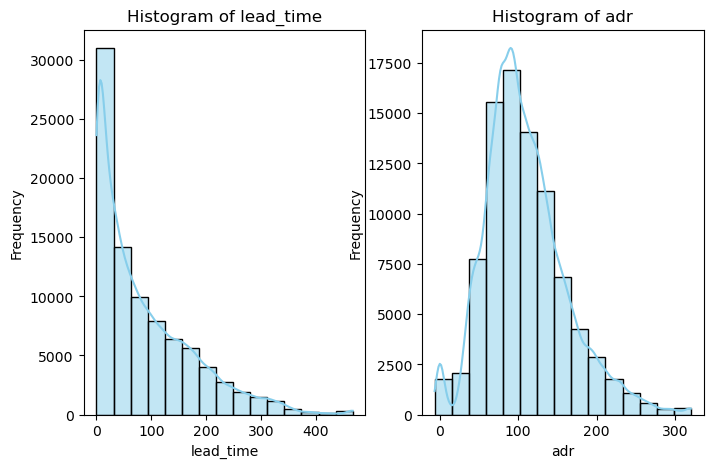

In [21]:
numerical_columns = ['lead_time','adr']
i = 1
fig = plt.figure(figsize=(8, 5))
for column in numerical_columns:
    column_data = df_resampled[column]
    skewness = stats.skew(column_data)
    plt.subplot(1, 2, i)
    h = sns.histplot(df_resampled, x=column, kde=True, color='skyblue', bins=15)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    i = i+1

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


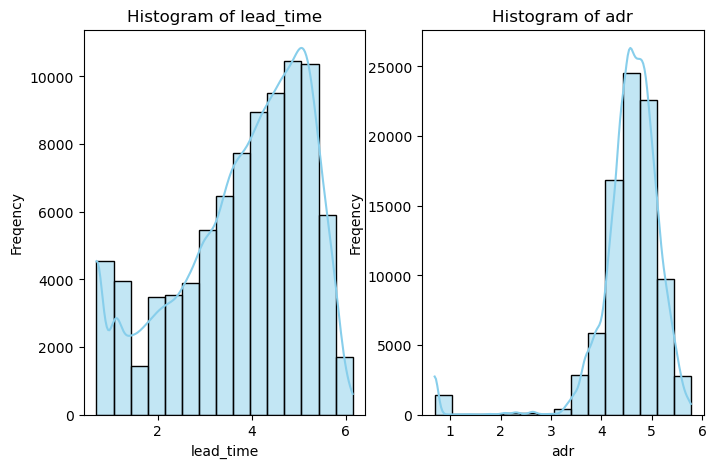

In [22]:
transformed_df = pd.DataFrame()

i = 1
fig2 = plt.figure(figsize=(8,5))
for column in numerical_columns:
    transformed_df[column]=np.log1p(df_resampled[column]+1)
    column_data = transformed_df[column]
    skewness = stats.skew(column_data)
    plt.subplot(1, 2, i)
    sns.histplot(transformed_df, x=column, kde=True, color='skyblue', bins=15)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Freqency')
    i = i+1

# Step 9 Scaling
Context:
- Scaling is required in machine learning to ensure that features with different units or scales do not dominate the learning process
- Some clustering algorithmns rely on the concept of distance between data points to determine which points are nearest neighbors. Scaling the features ensures that all features contribute equally to the distance calculation. If features are on different scales, those with larger scales may dominate the distance calculation.
- It is not necessary to apply standardization to categorical features, so we can create a list numerical_features that contains the list of all numerical columns and apply standardization only to them.

Hints:
1. Create a scaler object using MinMaxScaler()
2. Loop through the numerical_columns list to fit and transform the numerical columns using the functions fit() and transform()
3. After getting the scaled data use it to replace the original data in the numerical columns

In [23]:
scaler = MinMaxScaler()
numerical_columns = ['lead_time','adr']
for col in numerical_columns:
    numerical_data = transformed_df[col].values.reshape(-1, 1)
    X_scaled = scaler.fit_transform(numerical_data)
    transformed_df[col] = X_scaled
transformed_df.head(5)

,lead_time,adr
71538,0.127009,0.837488
1495,0.462803,0.809003
25730,0.524457,0.693974
27375,0.539526,0.603093
37173,0.074296,0.767893


# Clustering
- Clustering is a machine learning technique used to group similar data points together based on their features or characteristics. 
- In clustering, data points within the same group (cluster) are more similar to each other than to those in other groups.
- There are many types of clustering like:
    1. K-Nearest Neighbors (KNN) Clustering:It assigns a data point to the cluster represented by the majority of its k nearest neighbors in the feature space.
    2. K-Means Clustering: It partitions data into 'k' clusters by assigning each data point to the cluster with the nearest centroid (mean) based on a distance metric.
    3. Hierarchical Clustering:It builds a hierarchy of clusters by successively merging or splitting clusters. It results in a tree-like structure that shows relationships at different levels.
    4. DBSCAN (Density-Based Spatial Clustering of Applications with Noise): It is a density-based clustering algorithm. It groups together data points that are close to each other in feature space and separates regions of lower density.

- If our goal was to perform traditional clustering (grouping similar data points together without predefined classes or labels), K-Means, DBSCAN, or hierarchical clustering would typically be more appropriate choices. 
- KNN is better suited for classificationtasks where labeled data is present and we want to predict labels for new data points based on their similarity to labeled examples. In our case as we have a labeled dataset choose KNN.

# Step 10 Split data into train and test sets

1. Replace the numeric columns in the dataframe with their transformed versions.
2. Split the data into training and test sets using the train_test_split function. Specify X as the input features, y as the target variable, set test_size to 0.2 for an 80/20 split, and use random_state for reproducibility.

In [24]:
numerical_columns = ['adr','lead_time']
for column in numerical_columns:
    df_resampled[column] = transformed_df[column]

In [25]:
df_resampled['adr'] = df_resampled['adr'].fillna(0)
X = df_resampled.drop(['is_canceled'], axis=1)   
y = df_resampled['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Step 11  Train the KNN model

Hints:
1. Create a KNN object using KNeighborsClassifier()
2. Assingn k value as 4. 
3. Use the distance metric as cosine as it is computationally efficient.
4. Train the model by fitting it to the training data. Use the fit method and provide X_train (training features) and y_train (training labels) as input.
5. Make predictions on the test data using the trained model. Use the predict method with X_test as input to generate y_pred.
6. The reason for making y_test half is that predicting using KNN is computationally heavy hence the test dataset has been reduced. 

In [26]:

n_neighbors = 4  
knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric = 'cosine',n_jobs=-1)

knn.fit(X_train, y_train)
X_test = X_test[:int(len(X_test)/2)]
# Predict cluster labels for the testing data
y_pred_knn = knn.predict(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Step 12 Evaluate the model using the performance metrics
- The ROC AUC score of the best model >= 0.75
- The accuracy of the best model >= 0.7

Hints:
1. Get the evaluation by comparing y_pred and y_test with the use of accuracy_score() and classification_report()
2. Get the roc_auc score by comparing y_test and y_prob using roc_auc_score()

In [27]:

y_test = y_test[:int(len(y_test)/2)]

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy_knn}")
print("KNN Classification Report:\n", report_knn)

roc_auc = roc_auc_score(y_test, y_pred_knn)
print(f"ROC AUC: {roc_auc:.2f}")

KNN Accuracy: 0.8010297482837528
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      4322
           1       0.78      0.84      0.81      4418

    accuracy                           0.80      8740
   macro avg       0.80      0.80      0.80      8740
weighted avg       0.80      0.80      0.80      8740

ROC AUC: 0.80
